            y      x_01       x_02      x_03       x_04       x_05      x_06  \
0  375.823073  6.359019 -13.367120 -2.483750  -6.641891  11.733539       NaN   
1  266.811730  3.873664  -8.470389 -3.055012        NaN  11.420983  1.822330   
2  267.271759  5.275824 -12.070531 -1.366168  -4.819100  10.721527 -5.125992   
3  219.951294  4.430110  -4.467975 -0.730736 -10.047104  11.498539 -2.870260   
4  289.697954  3.116458  -8.518713 -6.796050        NaN   7.646285 -3.118309   

        x_07       x_08       x_09  ...       x_91       x_92      x_93  \
0 -17.085361  22.194764  16.827888  ... -10.200888   3.980048 -4.433274   
1 -13.694100  22.738654  20.307503  ...  -9.740207        NaN -2.629314   
2 -17.476865        NaN  15.963889  ... -14.501970  10.054005       NaN   
3 -14.033012  18.225190  10.409488  ... -11.086963   2.019726 -8.531959   
4 -13.102567  22.801217  16.680208  ...  -9.117422   6.627601 -2.805531   

       x_94       x_95  C_01  C_02  C_03  C_04  C_05  
0 -1.473723  

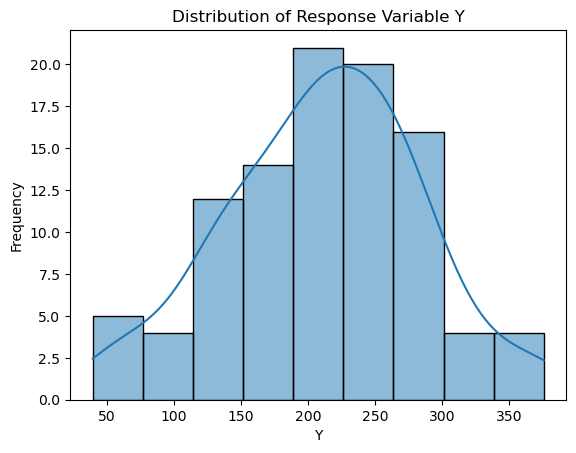

In [29]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('case1Data.csv')
data_xnew = pd.read_csv('case1Data_Xnew.csv')

# Display the first few rows of the data
print(data.head())
print(data_xnew.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the response variable Y
sns.histplot(data['y'], kde=True)
plt.title('Distribution of Response Variable Y')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.show()

# # Visualize the correlation matrix USELESS
# corr_matrix = data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [30]:
# Compute correlation of all features with 'y'
corr_with_y = data.corr()['y'].drop('y').sort_values(ascending=False)
print(corr_with_y)

# Plot the top 10 (or 20) most positively/negatively correlated features
top_pos = corr_with_y.head(10)
top_neg = corr_with_y.tail(10)

x_32    0.770303
x_36    0.478040
x_31    0.426011
x_14    0.404301
x_94    0.330637
          ...   
x_57   -0.089594
C_05   -0.092239
x_30   -0.221367
x_62   -0.267468
C_02         NaN
Name: y, Length: 100, dtype: float64


In [31]:
# # test if corr is significant
# high_corr = corr_matrix[abs(corr_matrix) > 0.5]
# print(high_corr)

# plt.figure(figsize=(12, 8))
# sns.heatmap(high_corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [32]:
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [33]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Count the number of rows with missing data
rows_with_missing_data = data.isnull().any(axis=1).sum()
print("Number of rows with missing data:", rows_with_missing_data)

# Calculate the total percentage of missing data
total_missing = data.isnull().sum().sum()
total_missing_percentage = data.isnull().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print("Total number of missing data:", total_missing)
print("Total percentage of missing data:", total_missing_percentage)
print("total data:", data.shape[0] * data.shape[1])



Missing values in each column:
 y        0
x_01    13
x_02    21
x_03    15
x_04    14
        ..
C_01    22
C_02    22
C_03    22
C_04    22
C_05    22
Length: 101, dtype: int64
Number of rows with missing data: 100
Total number of missing data: 1489
Total percentage of missing data: 14.742574257425742
total data: 10100


In [ ]:
# NOT SO GREAT OPTIONS
# Option 1: Remove rows with missing values
data_dropped_rows = data.dropna()
print("Data after dropping rows with missing values:\n", data_dropped_rows)

# Option 2: Remove columns with missing values
data_dropped_columns = data.dropna(axis=1)
print("Data after dropping columns with missing values:\n", data_dropped_columns)

In [ ]:

# Option 3: Fill missing values with a specific value (e.g., 0)
data_filled_zeros = data.fillna(0)
print("Data after filling missing values with 0:\n", data_filled_zeros)


In [ ]:

# Option 4: Fill missing values with the mean of the column
data_filled_mean = data_scaled.fillna(data_scaled.mean())
print("Data after filling missing values with column mean:\n", data_filled_mean)


In [ ]:

# Option 5: Interpolate missing values
data_interpolated = data.interpolate()
print("Data after interpolating missing values:\n", data_interpolated)
# Check for missing values

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline

# 1) Load data
# Use standardized data
X = data_scaled.iloc[:, 1:].values  # shape: (n_samples, 100)
y = data_scaled.iloc[:, 0].values
# Separate features (X) and response (y)

# 2) Define two pipelines:
#    (a) Mean Imputation + Ridge
#    (b) kNN Imputation + Ridge
pipe_mean = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', Ridge())
])

pipe_median = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('model', Ridge())
])

# 3) Cross-validation setup
#    We'll use 5-fold CV here; adjust folds as needed.
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4) Evaluate each pipeline using cross_val_score
#    We'll measure MSE, so we use 'neg_mean_squared_error' 
#    (sklearn returns negative values for MSE to align with "greater is better")
scores_mean = cross_val_score(pipe_mean, X, y, 
                              cv=cv, scoring='neg_mean_squared_error')
scores_knn  = cross_val_score(pipe_median, X, y, 
                              cv=cv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE by multiplying by -1
mse_mean = -scores_mean
mse_knn  = -scores_knn

print("Mean Imputation MSE per fold:", mse_mean)
print("Mean Imputation MSE (avg +/- std): %.4f +/- %.4f" 
      % (mse_mean.mean(), mse_mean.std()))

print("kNN Imputation MSE per fold:", mse_knn)
print("kNN Imputation MSE (avg +/- std): %.4f +/- %.4f" 
      % (mse_knn.mean(), mse_knn.std()))

# Compare the average MSE
if mse_mean.mean() < mse_knn.mean():
    print("\nMean Imputation yields a lower average MSE, so it may be better.")
else:
    print("\nkNN Imputation yields a lower average MSE, so it may be better.")


Mean Imputation MSE per fold: [0.2077603  0.18127684 0.37763016 0.26190665 0.18923565]
Mean Imputation MSE (avg +/- std): 0.2436 +/- 0.0727
kNN Imputation MSE per fold: [0.2092595  0.20885809 0.46222677 0.30259784 0.21396832]
kNN Imputation MSE (avg +/- std): 0.2794 +/- 0.0981

Mean Imputation yields a lower average MSE, so it may be better.


# FEATURES HANDLING FOR CATEGORICAL VARIABLES

In [ ]:
# Display the head of the last 5 columns
print(data_xnew.iloc[:, -5:].head())

# Display the description of the last 5 columns
print(data_xnew.iloc[:, -5:].describe())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# 1) Load Data


# Let's assume the first column is y (response), and the remaining 100 are features
y = data_scaled.iloc[:, 0].values
X = data_scaled.iloc[:, 1:].copy()

# Identify which 5 columns are categorical
# (Replace these with your actual column names or indices)
cat_cols = X.columns[-5:].tolist()  # e.g. last 5 columns
num_cols = [c for c in X.columns if c not in cat_cols]

# 2) Ordinal Encoding pipeline
ordinal_pipeline = ColumnTransformer(
    transformers=[
        # Numeric columns: mean-impute
        ("num", SimpleImputer(strategy="mean"), num_cols),
        # Categorical columns: most_frequent-impute, then Ordinal
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ordinal", OrdinalEncoder())
        ]), cat_cols)
    ]
)

# 3) One-Hot Encoding pipeline
onehot_pipeline = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ]
)

# 4) Create full pipelines with a model (e.g., Ridge)
pipe_ordinal = Pipeline([
    ("preprocess", ordinal_pipeline),
    ("model", Ridge())
])

pipe_onehot = Pipeline([
    ("preprocess", onehot_pipeline),
    ("model", Ridge())
])

# 5) Evaluate each pipeline via cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores_ord = cross_val_score(pipe_ordinal, X, y, 
                             cv=cv, scoring="neg_mean_squared_error")
scores_oh  = cross_val_score(pipe_onehot,  X, y, 
                             cv=cv, scoring="neg_mean_squared_error")

mse_ord = -scores_ord  # convert from negative MSE
mse_oh  = -scores_oh

print("Ordinal Encoding MSE per fold:", mse_ord)
print("Ordinal Encoding MSE Mean ± Std: %.4f ± %.4f" 
      % (mse_ord.mean(), mse_ord.std()))
print("One-Hot Encoding MSE per fold:", mse_oh)
print("One-Hot Encoding MSE Mean ± Std: %.4f ± %.4f" 
      % (mse_oh.mean(), mse_oh.std()))

# 6) Decide which encoding is "better"
if mse_ord.mean() < mse_oh.mean():
    print("\nOrdinal encoding yields a lower average MSE, so it may be better.")
else:
    print("\nOne-hot encoding yields a lower average MSE, so it may be better.")


In [27]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
num_cols = data.columns[:95]
cat_cols = data.columns[95:]

# Create imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')


# Fit the imputers on the respective columns
X_num_imputed = num_imputer.fit_transform(data[num_cols])
X_cat_imputed = cat_imputer.fit_transform(data[cat_cols])

# Combine the imputed numerical and categorical data
X_imputed = np.hstack((X_num_imputed, X_cat_imputed))

# Convert the combined data back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=num_cols.tolist() + cat_cols.tolist())

# MODEL SELECTION

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# 2) CHOOSE A CROSS-VALIDATION STRATEGY
# Let's do 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
X = X_imputed

# 3) BUILD PIPELINES
# We'll scale the features, then apply the regression model
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

pipe_enet = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
])

# 4) DEFINE PARAMETER GRIDS
# Adjust ranges depending on your data
param_grid_ridge = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

param_grid_lasso = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

param_grid_enet = {
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mix of L1 and L2
}

# 5) SET UP GRIDSEARCHCV FOR EACH MODEL
grid_ridge = GridSearchCV(
    estimator=pipe_ridge,
    param_grid=param_grid_ridge,
    scoring='neg_mean_squared_error',  # or 'neg_root_mean_squared_error'
    cv=cv,
    n_jobs=-1
)

grid_lasso = GridSearchCV(
    estimator=pipe_lasso,
    param_grid=param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1
)

grid_enet = GridSearchCV(
    estimator=pipe_enet,
    param_grid=param_grid_enet,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1
)

# 6) FIT EACH GRID SEARCH
grid_ridge.fit(X, y)
grid_lasso.fit(X, y)
grid_enet.fit(X, y)

# 7) INSPECT RESULTS AND COMPARE
print("RIDGE BEST PARAMS:", grid_ridge.best_params_)
print("RIDGE BEST CV MSE:", -grid_ridge.best_score_)  # Multiply by -1 to get positive MSE

print("LASSO BEST PARAMS:", grid_lasso.best_params_)
print("LASSO BEST CV MSE:", -grid_lasso.best_score_)

print("ENET BEST PARAMS:", grid_enet.best_params_)
print("ENET BEST CV MSE:", -grid_enet.best_score_)

# 8) CHOOSE THE BEST MODEL OVERALL
# e.g., Compare the best CV MSE from each approach:
best_mse_ridge = -grid_ridge.best_score_
best_mse_lasso = -grid_lasso.best_score_
best_mse_enet  = -grid_enet.best_score_

model_mses = [('Ridge', best_mse_ridge),
              ('Lasso', best_mse_lasso),
              ('ElasticNet', best_mse_enet)]
model_mses.sort(key=lambda x: x[1])  # Sort by MSE ascending
print("\nMODEL PERFORMANCE (sorted by best CV MSE):")
for name, mse in model_mses:
    print(f"{name}: MSE={mse:.4f}")

best_model_name, best_model_mse = model_mses[0]
print(f"\nBEST MODEL: {best_model_name} with MSE={best_model_mse:.4f}")

# 9) RETRAIN ON ALL DATA (OPTIONAL)
# If you want a final model to predict new data, refit the best pipeline with best params on the full dataset:
if best_model_name == "Ridge":
    best_params = grid_ridge.best_params_
    final_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(**{k.split('__')[1]: v for k, v in best_params.items()}))
    ])
elif best_model_name == "Lasso":
    best_params = grid_lasso.best_params_
    final_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(**{k.split('__')[1]: v for k, v in best_params.items()}))
    ])
else:  # "ElasticNet"
    best_params = grid_enet.best_params_
    final_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNet(**{k.split('__')[1]: v for k, v in best_params.items()}))
    ])

final_model.fit(X, y)
# Now use `final_model.predict(X_new)` to get predictions

RIDGE BEST PARAMS: {'model__alpha': 0.1}
RIDGE BEST CV MSE: 0.0422626113637382
LASSO BEST PARAMS: {'model__alpha': 0.001}
LASSO BEST CV MSE: 1.036740395626454e-06
ENET BEST PARAMS: {'model__alpha': 0.001, 'model__l1_ratio': 0.7}
ENET BEST CV MSE: 1.005898320356427e-06

MODEL PERFORMANCE (sorted by best CV MSE):
ElasticNet: MSE=0.0000
Lasso: MSE=0.0000
Ridge: MSE=0.0423

BEST MODEL: ElasticNet with MSE=0.0000


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ElasticNet(alpha=0.001, l1_ratio=0.7))])